# TP 1 - Regression, classification

## 1 - Regression of housing prices

In [3]:
# Preparing the dataset
import pandas as pd
import numpy as np

N = 10
x = 10 + 70 * np.random.random(N)
y = x * 15 + 50 + 100 * np.random.random(N)
df = pd.DataFrame(np.column_stack((x, y)), columns=('size', 'price')).round(0)
df.to_csv('1housing.csv', index=None)

We are going to build a predictor of the price of a flat in Lille according to its surface area.

In [4]:
import pandas as pd

df = pd.read_csv('1housing.csv')
df.T

,0,1,2,3,4,5,6,7,8,9
size,46.0,49.0,39.0,14.0,34.0,32.0,28.0,52.0,65.0,51.0
price,767.0,818.0,683.0,282.0,656.0,530.0,539.0,916.0,1063.0,848.0


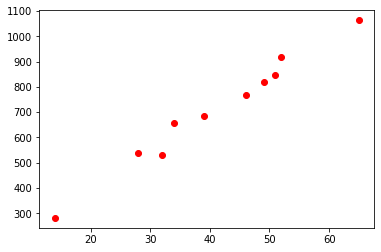

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

x = np.array(df['size'])
y = np.array(df['price'])
plt.scatter(x, y, c='r')

We want to learn $a$ and $b$ such that the predictions $f(x_i) = ax_i + b$.

Write a function `loss` that computes the squared loss: $$ \mathcal{L} = \sum_i (f(x_i) - y_i)^2 $$

What is the derivative of this function with respect to $a$ and $b$?

Implement gradient descent during 20 steps:

For each step:  
> For each sample $i$:  
>> $a \gets a - \gamma \frac{\partial \mathcal{L}}{\partial a}$  
>> $b \gets b - \gamma \frac{\partial \mathcal{L}}{\partial b}$

> Print loss at each step

In [6]:
def loss(params):
    a, b = params
    # Your code here

gamma = 0.1
# Implement gradient descent here

What happens? Try lower values of $\gamma$.

In [7]:
from autograd import grad  #, jacobian

a = np.random.random()
b = np.random.random()

def loss(params):
    a, b = params
    return sum((y - a * x - b) ** 2)

"""
gradient_loss = grad(loss)
# hessian_loss = jacobian(grad(loss))  # Newton
gamma = 0.00001
params = np.array([a, b])
for _ in range(10):
    # params -= np.linalg.inv(hessian_loss(params)) @ gradient_loss(params)
    params -= gamma * gradient_loss(params)
    print(loss(params), params)"""

gamma = 0.0001
for _ in range(20):
    for i in range(N):
        delta = a * x[i] + b - y[i]
        a -= gamma * x[i] * delta
        b -= gamma * delta
    print(loss([a, b]), [a, b])

96624.1159413668 [15.000217624550054, 1.0939687172327257]
19304.05891813517 [16.64323949008827, 1.1412832564078796]
16924.643696307954 [16.829477327719143, 1.1555182482896373]
16735.28155778296 [16.850431602002804, 1.1659991772184164]
16713.126216656907 [16.852633177190302, 1.1760532496556737]
16708.894529573085 [16.852707129899986, 1.1860579633858326]
16706.683147659427 [16.852539705556858, 1.196056148592636]
16704.701167619296 [16.852344913506965, 1.2060526647938254]
16702.745587148867 [16.852147034788363, 1.2160480634370563]
16700.79337828845 [16.851948824273475, 1.2260424071856102]
16698.841928524103 [16.851750594522265, 1.2360357032463347]
16696.89094139305 [16.851552380995184, 1.246027952534099]
16694.940383181874 [16.851354187713575, 1.2560191552498892]
16692.990249985636 [16.85115601513176, 1.2660093115136841]
16691.040541280963 [16.850957863299364, 1.2759984214362623]
16689.091256928215 [16.850759732220084, 1.2859864851273477]
16687.14239683121 [16.850561621892417, 1.295973502

Using `plt.plot`, display the line of your model.

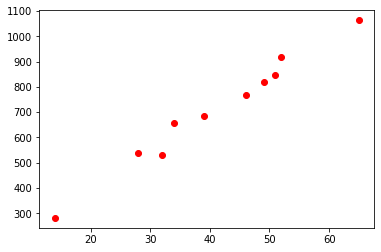

In [8]:
plt.scatter(x, y, c='r')
t = np.arange(0, 80, 1)
# plt.plot(t, a * t + b)

Now that you've trained your first machine learning model, you can use the code provided by the package scikit-learn.

You just need to declare the features in a matrix (not vector) and run:

- `fit(X, y)` to train;
- `score(X, y)` to get a measure of correctness (1 is best); for linear regression it is the coefficient of determination $R^2$.

In [9]:
from sklearn.linear_model import LinearRegression

X = x.reshape(-1, 1)  # Transform the vector x into a matrix X

In [10]:
model = LinearRegression()
model.fit(X, y)
model.score(X, y)

0.9821445710079398

(15.171011470281549, 88.1885297184565)

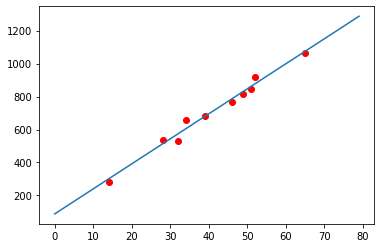

In [11]:
plt.scatter(x, y, c='r')
t = np.arange(0, 80, 1)
a, b = model.coef_[0], model.intercept_
plt.plot(t, a * t + b)
a, b

## 2 - Simple classification of tumors

In [12]:
# Preparing the dataset
import numpy as np

N = 200
radius = np.random.random(N)
angles = 2 * np.pi * np.random.random(N)
x1 = 1 + radius * np.cos(angles)
y1 = 3 + radius * np.sin(angles)

radius = np.random.random(N)
angles = 2 * np.pi * np.random.random(N)
x2 = 2.5 + radius * np.cos(angles)
y2 = 4.5 + radius * np.sin(angles)

x = np.concatenate((x1, x2))
y = np.concatenate((y1, y2))
r = np.array([1.] * N + [-1.] * N)

df = pd.DataFrame(np.column_stack((x, y, r)), columns=('color', 'size', 'label'))
df.to_csv('2tumors.csv', index=None)

In [13]:
df = pd.read_csv('2tumors.csv')
df

,color,size,label
0,0.860172,3.352011,1.0
1,1.206664,3.677313,1.0
2,0.847279,2.869402,1.0
3,1.305340,2.250628,1.0
4,0.513919,2.169618,1.0
...,...,...,...
395,1.628342,4.970346,-1.0
396,2.620280,4.826318,-1.0
397,2.041993,4.053759,-1.0
398,2.517886,4.211410,-1.0


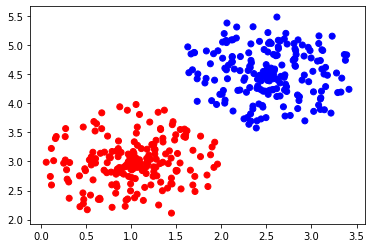

In [26]:
x = np.array(df['color'])
y = np.array(df['size'])
colors = ['r' if label > 0 else 'b' for label in r]

plt.scatter(x, y, c=colors)

Now the problem is different: we want to predict either 1 or -1.

Hence the penalty depends on $yf(x)$ (positive is better): $$\mathcal{L} = \sum_i \Phi(y_i f(x_i))$$

Here are various choices for $\Phi$:

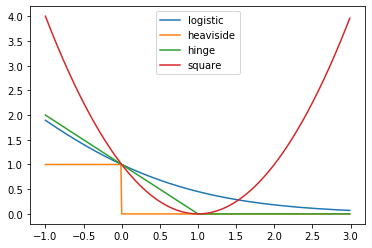

In [19]:
import autograd.numpy as np

# Different loss functions for classification
def logistic(x):
    return np.log(1 + np.exp(-x)) / np.log(2)

def heaviside(x):
    return (np.sign(-x) + 1.) // 2

def hinge(x):
    return np.maximum(0., 1 - x)

def square(x):
    return (1 - x) ** 2

t = np.arange(-1, 3, 0.01)
for f in [logistic, heaviside, hinge, square]:
    plt.plot(t, f(t), label=f.__name__)
plt.legend()

Our model is simple: if $y > ax + b$, predict 1, otherwise predict -1.

Write the corresponding loss function, depending on $\Phi$.

In [20]:
PHI = logistic

def loss(params):
    a, b = params
    # Your code here

To implement gradient descent this time, we will cheat. There is a package `autograd` that can compute the gradient of any numpy function.

In [21]:
from autograd import grad

gradient_loss = grad(loss)

Then if $w$ are `params`, `gradient_loss(params)` represents $\frac{\partial \mathcal{L}}{\partial w}$ at point $w$.

In [23]:
PHI = logistic

def loss(params):
    a, b = params
    return sum(PHI(r * (a * x + b - y)))

gradient_loss = grad(loss)

gamma = 0.1
params = np.random.random(2)
for _ in range(20):
    params -= gamma * gradient_loss(params)
    print(loss(params), params)

17868.55334234605 [17.62062253 21.96455412]
19175.989003097147 [-55.2037513   -6.88934669]
2611.3245558475983 [-25.63022083  21.96455377]
11889.488371035915 [ 0.71200777 43.9183547 ]
17875.765299928767 [-72.11236606  15.06445389]
2612.472707405445 [-42.63342538  43.09785206]
2098.2502442582786 [-19.90326403  60.81965777]
11493.785622805202 [-72.03741307  38.71717744]
495.98808939169226 [-43.4529214   64.20744897]
89.93644900155479 [-34.9651479   69.44924604]
72.78229193303693 [-37.01943624  68.20987049]
70.28336214700018 [-36.20920048  68.554222  ]
69.8535645293152 [-36.41093001  68.32102608]
69.7266352642653 [-36.29693635  68.26603419]
69.61694810105062 [-36.26308569  68.16563902]
69.50867697620994 [-36.20707023  68.07783239]
69.40056976679028 [-36.15713688  67.98661584]
69.29253498485242 [-36.10553648  67.8963794 ]
69.18456584876299 [-36.05442234  67.80590345]
69.07666204605766 [-36.00319168  67.71552958]


Try various values of `PHI` and `gamma`. You can then plot the results:

(1, 6)

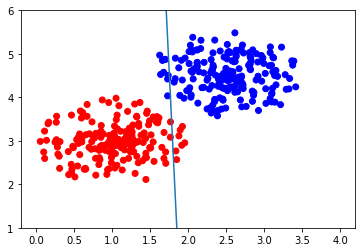

In [27]:
t = np.arange(0, 5, 1)
f, ax = plt.subplots(1)
plt.scatter(x, y, c=colors)
a, b = params
plt.plot(t, a * t + b)
ax.set_ylim((1, 6))

Let's compare the results with scikit-learn's logistic regression implementation.

In [28]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='none')
X = np.column_stack((x, y))
model.fit(X, r)

w1, w2 = model.coef_.reshape(-1)
bias = model.intercept_[0]
a, b = [-w1 / w2, -bias / w2]

(1, 6)

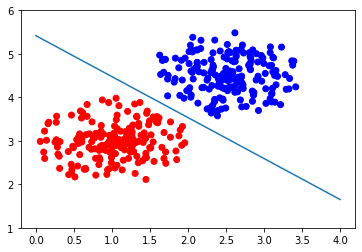

In [30]:
t = np.arange(0, 5, 1)
f, ax = plt.subplots(1)
plt.scatter(x, y, c=colors)

plt.plot(t, a * t + b)
ax.set_ylim((1, 6))

## 3 - Classification of tumors

Let us now consider a more complicated example.

In [36]:
# Preparing the dataset
N = 200
r = np.random.randint(2, size=N)
radius_x = 3 + r * 2
radius_y = 2 + r * 1
angles = 2 * np.pi * np.random.random(N)
x = 1. + radius_x * np.cos(angles)
y = 1. + radius_y * np.sin(angles)
r = r * 2 - 1

df = pd.DataFrame(np.column_stack((x, y, r)), columns=('color', 'size', 'label'))
df.to_csv('3tumors.csv', index=None)

In [37]:
df = pd.read_csv('3tumors.csv')
df.head()

,color,size,label
0,3.834564,1.654981,-1.0
1,-1.090146,-0.434695,-1.0
2,-2.905435,-0.873267,1.0
3,3.841463,1.641557,-1.0
4,-3.393475,2.432151,1.0


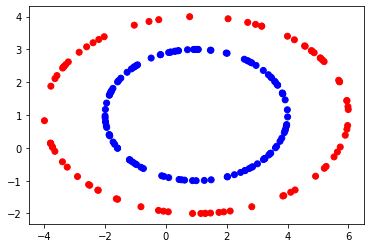

In [38]:
x = np.array(df['color'])
y = np.array(df['size'])
colors = ['r' if label > 0 else 'b' for label in r]

plt.scatter(x, y, c=colors)

Compute the score of scikit-learn's logistic regression. What happens?

What model are we trying to learn? How to add features?

Try also `from sklearn.svm import SVC`.

In [39]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
X = np.column_stack((x, y))
model.fit(X, r)
print(model.coef_)
print(model.score(X, r))

[[ 0.02884677 -0.0646638 ]]
0.59


In [40]:
x2 = x ** 2
y2 = y ** 2
xy = x * y
X2 = np.column_stack((x, y, x2, y2, xy))
model.fit(X2, r)
model.score(X2, r)

1.0

In [41]:
from sklearn.svm import SVC

model = SVC()
model.fit(X, r)
model.score(X, r)

1.0

## 4 - Classification of handwritten digits

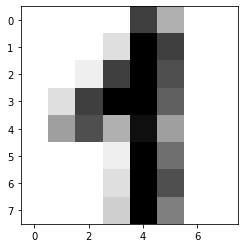

In [102]:
from sklearn import datasets, metrics

digits = datasets.load_digits()
plt.imshow(digits.images[42], cmap=plt.cm.gray_r)

In [103]:
from sklearn.model_selection import train_test_split

X = digits.images.reshape(-1, 64)
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

/home/jj/.local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9777777777777777

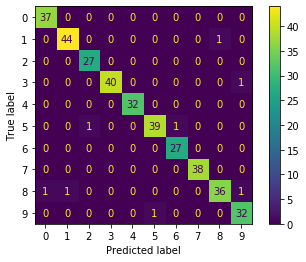

In [104]:
metrics.plot_confusion_matrix(model, X_test, y_test)

(<matplotlib.image.AxesImage at 0x7fdf61e1e910>, 8, 1)

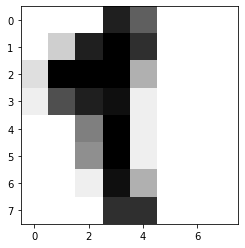

In [105]:
y_pred = model.predict(X_test)
bad_sample = list(y_pred != y_test).index(True)
plt.imshow(X_test[bad_sample].reshape(8, 8), cmap=plt.cm.gray_r), y_pred[bad_sample], y_test[bad_sample]

<BarContainer object of 10 artists>

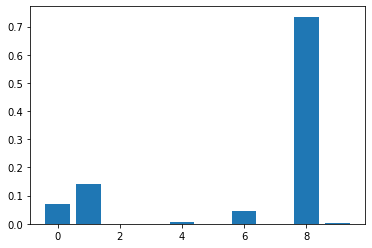

In [106]:
plt.bar(range(10), model.predict_proba(X_test[bad_sample].reshape(1, -1)).reshape(-1))

In [107]:
model = SVC()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9916666666666667

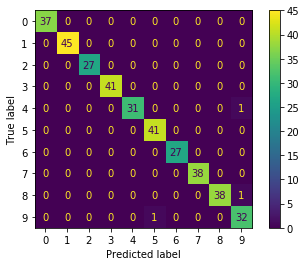

In [108]:
metrics.plot_confusion_matrix(model, X_test, y_test)

In [109]:
model.predict(X_test[bad_sample].reshape(1, -1))

array([1])